In [11]:
from random_stock_price_generator import RandomStockPrices
from get_historical_prices import HistoricalPrices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

In [21]:
# First with random simulated prices
rp = RandomStockPrices(start_date='2016-01-01', years=5, num_assets=490)
returns = rp.returns
returns.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK480,TICK481,TICK482,TICK483,TICK484,TICK485,TICK486,TICK487,TICK488,TICK489
2016-01-01,0.004032,0.010862,0.000262,-0.010882,0.003198,0.005899,-0.001032,0.005417,0.000313,0.013548,...,0.006187,0.001563,-0.000513,-0.003346,0.006237,0.007317,-0.000113,-0.012536,0.005209,-0.004469
2016-01-04,0.008354,-0.009517,0.005736,-0.000601,-0.004565,-0.004205,-0.000962,0.007445,0.005204,-0.001801,...,-0.005439,-0.007884,-0.017142,0.013082,-0.017165,-0.008249,0.006684,-0.014531,0.003578,-0.001098
2016-01-05,0.008738,-0.008829,-0.008025,-0.003283,-0.021005,-0.000080,0.007771,0.000649,-0.003696,-0.002222,...,0.010928,-0.003820,-0.001843,0.013138,-0.017966,-0.021506,0.000008,0.007932,-0.004704,0.018224
2016-01-06,0.006961,0.015262,-0.011672,-0.004940,-0.005961,-0.005043,-0.017813,0.011284,-0.001880,0.015047,...,0.019974,-0.008493,0.000193,-0.002275,0.010791,0.010365,0.002446,-0.021274,-0.002808,0.004943
2016-01-07,0.001935,0.004641,-0.002030,-0.006759,-0.010745,0.000033,0.007757,0.008865,-0.002968,-0.007848,...,-0.022875,0.003419,-0.000487,-0.006827,0.000480,-0.005768,0.001777,0.011179,-0.013776,0.002905


In [22]:
# note numpy is will use the rows as the different series, we want it to use the columns so we need the transpose
annualization_factor = 252
covariance_matrix = annualization_factor * np.cov(returns.T)
covariance_matrix.shape

(490, 490)

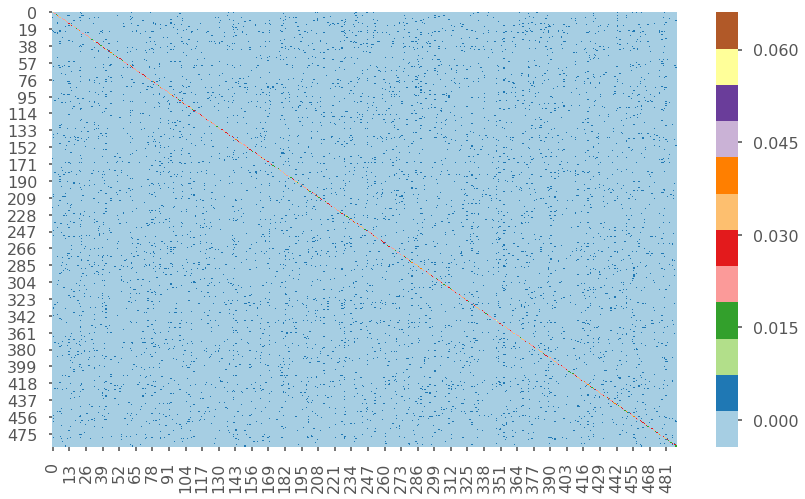

In [23]:
import seaborn as sns
sns.heatmap(covariance_matrix, cmap='Paired')

In [2]:
# now doing the same thing with actual prices (not simulated)
hp = HistoricalPrices(prices_dir='../prices')
hp.get_prices()

100%|██████████| 966/966 [00:43<00:00, 22.26it/s]


In [3]:
prices = hp.prices
prices.head()

high        low   adjclose      volume
ticker date                                                   
CSCO   2012-01-03  18.860001  18.480000  14.852622  41236600.0
       2012-01-04  19.000000  18.350000  15.139630  52927700.0
       2012-01-05  19.000000  18.670000  15.083825  37865300.0
       2012-01-06  19.000000  18.830000  15.028019  27796900.0
       2012-01-09  19.100000  18.790001  15.123683  37811500.0

In [5]:
pivoted_prices = prices.reset_index(level=0).pivot(columns='ticker', values='adjclose').dropna(axis=1)
pivoted_prices = pivoted_prices.iloc[:,:490]
print(pivoted_prices.shape)
pivoted_prices.head()

(1896, 490)


ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,MS,MSCI,MSFT,MSI,MSM,MTB,MTD,MTN,MU,MUR
date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,24.242914,20.893423,4.877474,68.042702,51.464207,33.846745,18.250000,22.961781,31.544683,12.493333,...,14.140447,30.891130,22.229851,40.094715,60.148033,65.306053,152.389999,34.015537,6.76,37.740330
2012-01-04,24.050198,21.391426,4.791737,69.637924,51.740776,33.962326,18.110001,22.872713,31.221191,12.266666,...,14.017335,30.458029,22.753004,39.871101,60.905235,65.297684,152.190002,33.241096,6.99,37.337650
2012-01-05,24.588482,21.187698,5.210895,70.081047,52.315197,34.220150,18.270000,22.820084,31.439375,12.500000,...,14.316328,30.806395,22.985518,40.137707,61.527817,66.301872,153.910004,32.466648,7.16,36.947971
2012-01-06,24.854307,20.734968,5.334737,70.405983,52.862103,34.309063,18.139999,22.613623,31.311480,12.486667,...,13.982162,31.164165,23.342588,40.034508,61.004410,66.485977,155.360001,32.594315,7.20,36.831089
2012-01-09,25.505566,21.346159,5.449052,70.386292,52.778248,34.291283,18.209999,22.609575,31.176056,12.396667,...,14.245973,31.041773,23.035341,39.716309,61.814873,66.636597,156.149994,33.300671,7.29,36.850567


In [6]:
returns = pivoted_prices.pct_change().fillna(0)
returns.drop(returns.index[:1], inplace=True)
print(returns.shape)
returns.head()

(1895, 490)


ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,MS,MSCI,MSFT,MSI,MSM,MTB,MTD,MTN,MU,MUR
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.007949,0.023835,-0.017578,0.023444,0.005374,0.003415,-0.007671,-0.003879,-0.010255,-0.018143,...,-0.008706,-0.014020,0.023534,-0.005577,0.012589,-0.000128,-0.001312,-0.022767,0.034024,-0.010670
2012-01-05,0.022382,-0.009524,0.087475,0.006363,0.011102,0.007591,0.008835,-0.002301,0.006988,0.019022,...,0.021330,0.011438,0.010219,0.006687,0.010222,0.015379,0.011302,-0.023298,0.024320,-0.010437
2012-01-06,0.010811,-0.021368,0.023766,0.004637,0.010454,0.002598,-0.007116,-0.009047,-0.004068,-0.001067,...,-0.023342,0.011614,0.015535,-0.002571,-0.008507,0.002777,0.009421,0.003932,0.005587,-0.003163
2012-01-09,0.026203,0.029476,0.021429,-0.000280,-0.001586,-0.000518,0.003859,-0.000179,-0.004325,-0.007208,...,0.018868,-0.003927,-0.013163,-0.007948,0.013285,0.002265,0.005085,0.021671,0.012500,0.000529
2012-01-10,0.018760,0.001060,0.000000,0.000840,0.003580,0.011408,-0.002746,0.004655,0.013514,0.006453,...,0.042593,0.016682,0.003605,0.002382,-0.003687,0.006405,0.035351,0.029900,-0.005487,0.043355


In [8]:
annualization_factor = 252
covariance_matrix = annualization_factor * np.cov(returns.T)
covariance_matrix.shape

(490, 490)

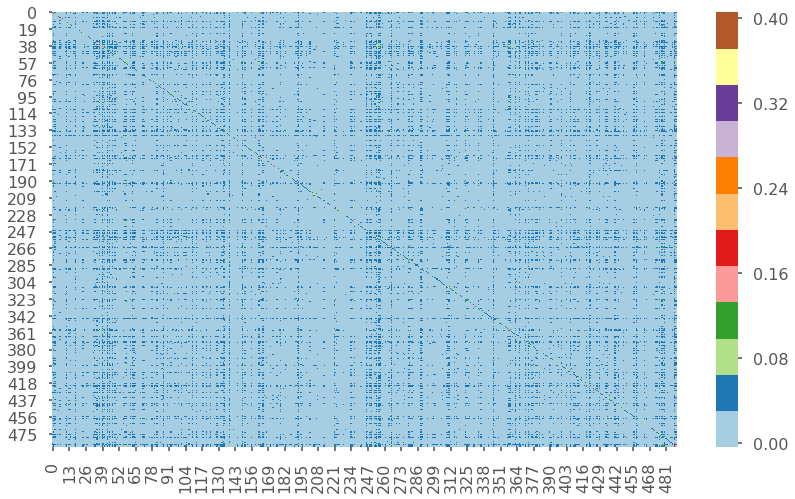

In [12]:
import seaborn as sns
sns.heatmap(covariance_matrix, cmap='Paired')

In [30]:
# The range above is mostly positive with values from 0.0 to 0.40 and most below 0.08